In [ ]:
import netCDF4

In [ ]:
nc = netCDF4.Dataset('gps240323g.002.nc', 'r')

In [ ]:
nc

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    catalog_text: Catalog information from record 0:                                                                                                                              KRECC       2001 Catalogue Record, Version 1                                    KINSTE     8000 World-wide GNSS Receiver Network                                MODEXP    3500                                                                  ALT1         350 km. Lowest altitude measured                                   ALT2         350 km. Highest altitude measured                                  GGLAT1       -90 degrees. Lowest geographic latitude measured                   GGLAT2        89 degrees. Highest geographic latitude measured                  GGLON1      -180 degrees. Westmost geographic longitude measured                GGLON2       179 degrees. Eastmost geographic longitude measured                IBYRE       2024 Beginnin

In [ ]:
nc.variables.keys()

dict_keys(['timestamps', 'gdlat', 'glon', 'dtec', 'tec'])

In [ ]:
nc_tec = nc['tec']
tec = nc_tec[:]
tec.shape

(288, 180, 360)

In [ ]:
nc_lon = nc['glon']
lon = nc_lon[:]
nc_lat = nc['gdlat']
lat = nc_lat[:]

In [ ]:
nc_time = nc['timestamps']
times = nc_time[:]

In [ ]:
from astropy.time import Time
import astropy.units as u
import numpy as np

# Define the start time and time interval
start_time = Time("2024-03-23 00:00:00")
num_intervals = 288
time_interval = 5 * u.minute

# Create the time array
time_array = start_time + np.arange(num_intervals) * time_interval

In [ ]:
time_array[0].isot[:-4]

'2024-03-23T00:00:00'

In [ ]:
len(time_array)

288

In [ ]:
nc_dtec = nc['dtec']
dtec = nc_dtec[:]
dtec.shape

(288, 180, 360)

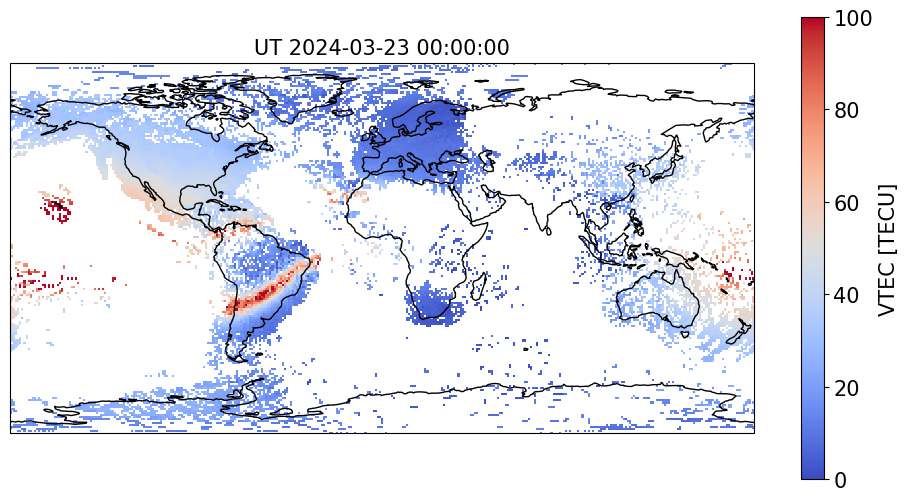

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

tidx = 0
data_slice = tec[tidx, :, :]
lon_grid, lat_grid = np.meshgrid(lon, lat)
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 6))
plot = ax.pcolormesh(lon_grid, lat_grid, data_slice, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=0, vmax=100)
ax.coastlines()
# ax.add_feature(cfeature.BORDERS, linestyle=':')
# Add colorbar
cbar = plt.colorbar(plot, ax=ax)
cbar.set_label('VTEC [TECU]', fontsize=15)
cbar.ax.tick_params(labelsize=15)
ax.set_title(f'UT {time_array[tidx].iso[:-4]}', fontsize=15)
# fig.savefig(f'tec_{tidx}.png')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import netCDF4
from pathlib import Path
from tqdm import tqdm
# import cartopy.feature as cfeature

def draw_tec(fname):
    nc = netCDF4.Dataset(f'{fname}.002.nc', 'r')
    nc_tec = nc['tec']
    tec = nc_tec[:]
    nc_lon = nc['glon']
    lon = nc_lon[:]
    nc_lat = nc['gdlat']
    lat = nc_lat[:]

    output_dir = Path(f'out_{fname}')
    output_dir.mkdir(exist_ok=True)

    times = tec.shape[0]
    for tidx in tqdm(range(times)):
        data_slice = tec[tidx, :, :]
        lon_grid, lat_grid = np.meshgrid(lon, lat)
        fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 6))
        plot = ax.pcolormesh(lon_grid, lat_grid, data_slice, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=0, vmax=100)
        ax.coastlines()
        cbar = plt.colorbar(plot, ax=ax)
        cbar.set_label('VTEC [TECU]', fontsize=15)
        cbar.ax.tick_params(labelsize=15)
        ax.set_title(f'UT {time_array[tidx].iso[:-4]}', fontsize=15)

        fig.savefig(output_dir / f'tec_{fname}_{tidx}.png', bbox_inches='tight', pad_inches=0.1, dpi=300)
        plt.close(fig)

In [ ]:
draw_tec('gps240323g')

100%|██████████| 288/288 [01:24<00:00,  3.40it/s]


In [ ]:
draw_tec('gps240324g')

100%|██████████| 288/288 [01:27<00:00,  3.30it/s]


In [ ]:
draw_tec('gps240325g')

100%|██████████| 288/288 [02:14<00:00,  2.14it/s]
